# 2.1.1 Assignment 2 Problem (20 points): Check for uniform sampling

**Problem:** Write a Python function to collect the outcomes of many rolls of a die (or the result of rolling more and more dice). Calculate the probabilities of obtaining the results 1 through 6 as a function of the number of rolls $N$, and plot the error (i.e. the difference between the calculated value and the theoretical value of 1/6) as a function of $N$ on a log-log plot. Fit the curve to a line and determine the slope. What do you find, and is this consistent with expectations?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
generateDiceRoll

This function generates a random roll of a dice, 
or anything with evenly split probability.

Parameters:
  sides: Number of sides of the dice.
Returns:
  The result of the roll.
"""
def generateDiceRoll(sides):
  return np.random.randint(1, sides+1)

"""
manyRollResults

This Function collects the aggregated results of
as many dice rolls as you desire.

Parameters:
  numRolls: Number of rolls of the dice to aggregate.
  sides: Number of sides of the dice.
Returns:
  A tuple containing the possible values of the dice,
  and the number of times that value showed up, in 
  (value, rollsPerSide) format.
"""
def manyRollResults(numRolls, sides):
  
  values = [x for x in range(1, sides+1)]
  rollsPerSide = [0 for x in range(1, sides+1)]
  
  for roll in range(numRolls):
    result = generateDiceRoll(sides)
    rollsPerSide[result-1] += 1
  return(values, rollsPerSide)

"""
calcProbability

This function, given the number of rolls for each
possibility, and the number of rolls total, calculates
the probability of each possibility appearing.

Parameters:
"""
def calcProbability(rollsPerSide, numRolls):
  #print(rollsPerSide)
  discoveredProbability = []
  for entry in rollsPerSide:
    discoveredProbability.append(float(entry)/numRolls)
  return discoveredProbability

"""
calcError

This function calculates the difference between the 
experimental and theoretical probabilities for the
dice roll, and sums up the differences.

Parameters:
  discoveredProbability: Calculated probabilities for
  each and every face of the dice, in a list.
  numSides: Number of sides on this dice.
Returns:
  error: the total difference between the expected
  probability and the actual probability, summed over
  all possibilities of this dice.
"""    
def calcError(discoveredProbability, numSides):
  errorList = []
  for entry in discoveredProbability:
    errorList.append(entry - (1/numSides))
  error = 0
  for entry in errorList:
    error += abs(entry)
  return error


In [2]:
#Sanity Check
print(manyRollResults(100, 6)[1])

[16, 22, 21, 9, 17, 15]


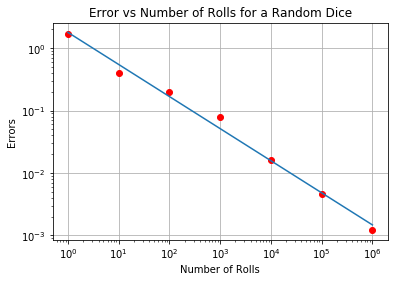

In [3]:
#Variables
sides = 6
#N = [x for x in range(1, 999)] #If we want a finer gradient.
N = [10**x for x in range(7)]
rollResults = []

probabilitiesPerN = []
errors = []

#Run through the functions, processing until we get the results we want - the probabilities and the errors.
for entry in N:
  rollResults.append(manyRollResults(entry, sides))

for index in range(len(rollResults)):
  probabilitiesPerN.append(calcProbability((rollResults[index][1]), N[index]))

for index in range(len(probabilitiesPerN)):
  errors.append(calcError(probabilitiesPerN[index], sides))

#Plot the results.
plt.loglog(N, errors, "ro", basex=10, basey=10)

#Plot the line of best fit
m, c = np.polyfit(np.log(N), np.log(errors), 1) # Find the fit values for the line
errorLineY = np.exp(m*np.log(N) + c) # Find fitted values of N for the range of N 
plt.plot(N, errorLineY, '-')

#Graph Labelling
plt.title("Error vs Number of Rolls for a Random Dice")
plt.ylabel('Errors')
plt.xlabel('Number of Rolls')
plt.grid()
plt.show()

We find that the curve for the loglog graph of Error vs N is linear, and slopes downward. This is consistent with our notion that as the number of samples of a random event is increased, we approach the theoretical probabilities with ever greater precision. In particular, it is consistent with the expectation that our error decreases propotionally to 1/sqrt(n) or (n^(-1/2)), which when plotted on a log log scale gives us log(y) = -(1/2) log(N), which is roughly what we see, save for a horizontal displacement c, which is due to the fact that at 1 roll, error is not zero but rather at its greatest, so it is completely consistent with my expectations.

# 2.2 Macrostates, Statistics, and Entropy


# 2.2.1 Macrostates
If the coin is unfair, so that $p$ is the probability of obtaining heads and $q$ is the probability of obtaining tails, we still need $p+q=1$. But now if there are $N$ events, made up of $n_1$ head outcomes and $n_2$ tail outcomes ($N=n_1+n_2$), the microstate probability $P_{\rm micro}$ is
$$P_{\rm micro}=P_{\rm micro}(n_1)=p^{n_1}q^{n_2}=p^{n_1}(1-p)^{N-n_1}.$$

Suppose that we weren't interested in the exact outcome, i.e. heads, tails, tails, heads, heads, etc. Instead, imagine that we were only interested in the probability of obtaining $n_1$ heads and $n_2=N-n_1$ tails, *irrespective of the order*. We would need to count all of the microstates satisfying this condition. The resulting **macrostate** probability is then $P_{\rm macro}(n_1)=\Omega(n_1)p^{n_1}q^{N-n_1}$, where $\Omega(n_1)$ is the number of ways of arranging
$n_1$ events with $p$ and $N-n_1$ events with $q$. We also know that the sum over all macrostate probabilities should also be unity:
$$\sum_{n_1}P_{\rm macro}(n_1)=\sum_{n_1}\Omega(n_1)p^{n_1}q^{N-n_1}=1.$$
Let's use the binomial theorem:
$$(p+q)^N=1=\sum_{n=0}^N\left({N!\over n!(N-n)!}\right)p^nq^{N-n}.$$

Comparison of the two displayed equations above shows that the number of ways of distributing microstates in a macrostate is given by:
$$\Omega(N,n)={N!\over n!(N-n)!}\equiv\pmatrix{N\cr n}.$$
These are the binomial coefficients, which can be found using Pascal's triangle. By the way, the right hand side of the above equation is read ''$N$ choose $n$." Note that if $p=q=1/2$ then
$$\sum_{n=0}^N{N!\over n!(N-n)!}=2^N,$$
as expected.

If there are more than two possible outcomes for a simple event (for example there are 6 possible outcomes for a roll of a die), then the expression above generalizes. For $d$ possible outcomes, we obtain the $d$-nomial
$$\Omega={N!\over n_1!n_2!\cdots n_d!}=\frac{N!}{\prod_i^dn_i!}.$$



# 2.2.2 Statistics
Let's return to coins. We'd like to know what the average (mean) number of heads we obtain after $N$ events, and what the standard deviation is around this mean. The average number of heads can be found using
\begin{eqnarray}
\overline{n_1}=\sum_{n_1=0}^Np(n_1)n_1&=&\sum_{n_1=0}^N{N!\over
n_1!(N-n_1)!}p^{n_1}q^{N-n_1}n_1\nonumber \\
&=&\sum_{n_1=0}^N{N!\over n_1!(N-n_1)!}q^{N-n_1}\left[n_1p^{n_1}\right]
\nonumber \\
&=&\sum_{n_1=0}^N{N!\over n_1!(N-n_1)!}q^{N-n_1}\left[p{d\over
dp}\left(p^{n_1}\right)\right]\nonumber  \\
&=&p{d\over dp}\sum_{n_1=0}^N{N!\over n_1!(N-n_1)!}q^{N-n_1}p^{n_1}\nonumber \\
&=&p{d\over dp}\left[(p+q)^N\right]\qquad\mbox{from binomial
theorem}\nonumber \\
&=&pN(p+q)^{N-1}=pN.\qquad\mbox{since $p+q=1$.}
\end{eqnarray}
So the mean number of heads is just the total number of steps
times the probability of taking a step to the right. No surprises here!
Obviously we also know that $\overline{n_2}=qN$ and so
$\overline{m}=N(p-q)$.

Now for the variance, $(\Delta n_1)^2=\overline{n_1^2}
-\overline{n_1}^2$. Because we already know $\overline{n_1}$, we only need
to obtain $\overline{n_1^2}$. But now, instead of a factor of $n_1$ appearing in the sum, there is now a factor of $n_1^2$. It would
be nice to use a derivative trick like we used above. Check it out! Using
$${d\over dp}\left(p^{n_1}\right)=n_1p^{n_1-1}\quad{\rm and}\quad{d^2\over dp^2}
\left(p^{n_1}\right)=n_1(n_1-1)p^{n_1-2},$$
one gets
$$p^2{d^2\over dp^2}\left(p^{n_1}\right)=(n_1^2-n_1)p^{n_1}\quad\Rightarrow
\quad n_1^2p^{n_1}=p^2{d^2\over dp^2}\left(p^{n_1}\right)+n_1p^{n_1}.$$
So right away the result can be written down:
\begin{eqnarray}
\overline{n_1^2}&=&p^2{d^2\over dp^2}\left[(p+q)^N\right]+pN\nonumber \\
&=&p^2\left[N(N-1)(p+q)^{N-2}\right]+pN\nonumber \\
&=&p^2N(N-1)+pN.\nonumber
\end{eqnarray}
So
$$(\Delta n_1)^2=\overline{n_1^2}-\overline{n_1}^2=p^2N^2-p^2N+pN-p^2N^2
=Np(1-p)=Npq.$$

The standard deviation, the square root of the variance, is therefore
$\Delta n_1=\sqrt{Npq}=\sqrt{N}/2$ for a fair coin. The relative error is therefore
$${\Delta n_1\over\overline{n_1}}={\sqrt{Npq}\over
Np}={1\over\sqrt{N}}\sqrt{q\over p}={1\over\sqrt{N}}\quad\mbox{when $p=q$.}$$
As the number of steps $N$ increases, $\overline{n_1}$
also increases but the relative width of the distribution actually sharpens
like $N^{-1/2}$. This is an important result on the fluctuations around the mean for a normal distribution. 

Did you find that the error in Problem 2.1.1 scaled like $N^{-1/2}$? 

# 2.2.3 Assignment 2 Problem (20 points)
Calculate the macrostate probability $P(n_1)$ for a coin, and plot the function against $n_1$ for a few large values of $N$ ($N\approx 100 - 200$ should be large -- and tricky -- enough). Show that the function is well-approximated by a Gaussian centered at $n_1=N/2$ with a width scaling like $1/\sqrt{N}$.

The following piece of code will allow us to view the probability distribution of the coin of the coin falling on any side, provided its the same side continously.

In [4]:
#import the required libraries

import numpy as np
import matplotlib.pyplot as plt

In [5]:
#program an objective class to compute the Binomial distrbution of a function utilizing the mathematics 
#displayed in the lecture
class Binomial_distribution(object):   
    #Initialize the statistical information required to compute the possible states
    def __init__(self, choose):
        self.choose = choose        
    #create an attribute for probability or Omega
    def Probability(self):
        N = self.choose[0]
        n = self.choose[1]
        p = self.choose[2]
        q = 1-self.choose[2]
        
        #compute the choose or combinations (N choose n)
        def Combinations(N,n):
        #Sum the components up, where N_ex = N!, n_ex = n!,N_n_ex = (N-n)!                    
            def N_ex(N):
                x = 1
                for i in range(1,N+1):
                    x = x*i
                return x
            def n_ex(n):
                x = 1
                for i in range(1,n+1):
                    x = x*i
                return x
            def N_n_ex(N,n):
                N_n = N-n
                x = 1
                for i in range(1,N_n+1):
                    x = x*i
                return x
            #implement the mathematics above and calculate Omega desired
            def Omega(N,n):
                M = N_ex(N)
                m = n_ex(n)
                M_m = N_n_ex(N,n)
                omega = M/(m*M_m)
                return omega
            
            return Omega(N,n)
        
        Omega = Combinations(N,n)
        
        #Once Omega is calculated, probability for each n can be calculated and thus P(n) can be calculated;
        #this is displayed below        
        def Prob_arrangements(Omega, p, q, N,n):
            
            probability = Omega*(p**n)*(q**(N-n))
            
            return probability
        #return the Probability to complete the attribute
        return Prob_arrangements(Omega, p, q, N,n)
        #return Omega(N,n)   

In [6]:
#for a coin toss, let p = 0.5 for any side
#N = number of trials
#n = number of times the coin will land on heads or tails
N = 200
p = 0.5
#n = 1
#flip n from 1 to the N range and get the probabilities
number_of_heads = []
Probability_of_heads = []
for n in range(1,N+1):
    number_of_heads.append(n)   
    statistical_variables = (N,n,p)
    P = Binomial_distribution(statistical_variables).Probability()
    #print(P)
    Probability_of_heads.append((P))


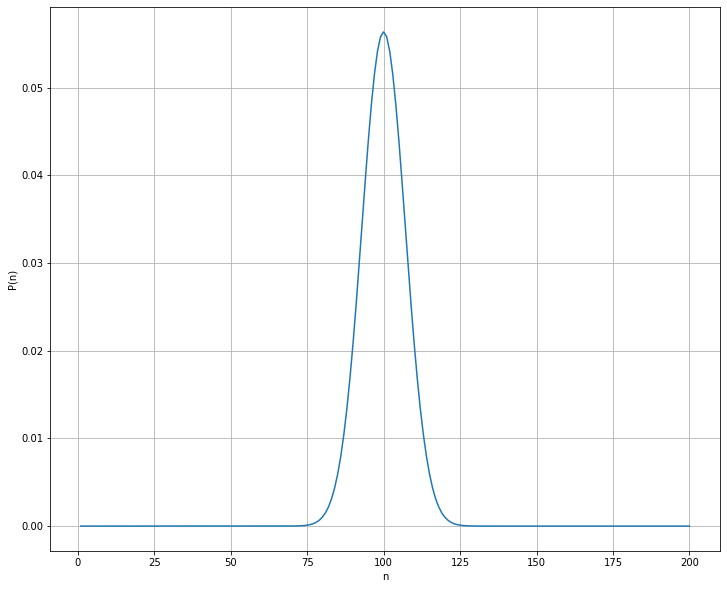

In [7]:
#form the desired graph
plt.figure(figsize=(12,10))
plt.plot(number_of_heads,Probability_of_heads)
plt.grid(True)
plt.xlabel("n")
plt.ylabel("P(n)")

plt.show()

As requested the Gaussian is centered at N/2, in our case N was 200, hence N/2 = 100; now for scaling

It's is stated that; 

$${\Delta n_1\over\overline{n_1}}={1\over\sqrt{N}}\quad\mbox{when $p=q$.}$$

Let's proof it utilizing the code below:

In [8]:
def Scaling(N):
    #the following function will compute n bar
    def n_b(N):
        nb = 0
        p = 0.5
        for n in range(1,N+1):
            statistical_variables = (N,n,p)
            P = Binomial_distribution(statistical_variables).Probability()
            nb = nb + n*P
        return nb
    #the following will compute n squared bar
    def n_b_2(N):
        nb2 = 0
        p = 0.5
        for n in range(1,N+1):
            statistical_variables = (N,n,p)
            P = Binomial_distribution(statistical_variables).Probability()
            nb2 = nb2 + (n**2)*P
        return nb2
    #the following will compute the error in n as shown by the mathematics above
    d_n = (n_b_2(N)-n_b(N)**(2))**(1/2)
    #this will compute the left side ratio as shown
    ratio = d_n/n_b(N)
    #this will compute the scale on the right
    scale = 1/(N**(1/2))
    #the following will return both for comparision 
    return ratio, scale

In [9]:
N= 200
left = Scaling(N)[0]
right = Scaling(N)[1]

print("Thus the scaling on both sides are for right and left", left, right, "respectively")

Thus the scaling on both sides are for right and left 0.07071067811864959 0.07071067811865475 respectively


As can be seen the condition has been satisified and as such it does scale with N. 

# 2.2.4 Boltzmann and Shannon Entropy

Boltzmann introduced the idea of entropy as 
$$S=k_B\ln(\Omega),$$
where $k_B$ is today known as Boltzmann's constant, and has the value of $k_B\approx 1.38\times 10^{-23}$ J/K. It is super important for thermodynamics, but this is a long story. Hopefully you'll learn all about it in statistical mechanics. In any case, for the $d$-nomial in the previous subsection, we obtain
\begin{eqnarray}
\ln(\Omega)&=&\ln\left({N!\over\prod_{i=1}^dn_i!}\right)\nonumber \\
&=&N\ln(N)-N-\ln\left(\prod_in_i!\right)\qquad
\mbox{using Stirling's formula since $N\gg 1$}\nonumber \\
&=&N\ln(N)-N-\sum_i\left[n_i\ln(n_i)-n_i\right],
\end{eqnarray}
if $n_i\gg 1$ for all $n_i$. We know from the subsection above that as $N\to\infty$, $\overline{n}_i=Np_i$, so we can replace $n_i$ with $Np_i$:
\begin{eqnarray}
\ln(\Omega)&=&N\ln(N)-N-\sum_i\left[Np_i\ln(Np_i)-Np_i\right]\nonumber \\
&=&N\ln(N)-N-N\ln(N)\sum_ip_i-N\sum_ip_i\ln(p_i)+N\sum_ip_i\qquad
\mbox{but $\sum_ip_i=1$}\nonumber \\
&=&-N\sum_ip_i\ln(p_i).\nonumber
\end{eqnarray}
So, the Boltzmann entropy at equilibrium becomes 
\begin{equation}
S=-Nk_B\sum_ip_i\ln(p_i).
\end{equation}

This entropy is a maximum when all the probabilities are equal, $p_i=1/N$, corresponding to the classical limit of simple events. This is easy to check:
\begin{eqnarray}
\frac{\partial}{\partial p_j}S&=&\frac{\partial}{\partial p_j}\left[-Nk_B\sum_ip_i\ln(p_i)\right]\\
&=&-Nk_B\frac{\partial}{\partial p_j}\left[p_1\ln(p_1)+\ldots+p_j\ln(p_j)+\ldots+(1-p_1-\ldots-p_j-\ldots-p_{N-1})\ln(1-p_1-\ldots-p_j-\ldots-p_{N-1})\right],
\end{eqnarray}
where in the second line I have made use of the fact that the $p_i$s are not independent (for example $p_1+p_2=1$). So
\begin{eqnarray}
\frac{\partial}{\partial p_j}S&=&-Nk_B\left[\ln(p_j)+1-\ln(1-p_1-\ldots-p_j-\ldots-p_{N-1})-1\right].\\
\end{eqnarray}
Setting this to zero gives
$$p_j=1-p_1-\ldots-p_j-\ldots-p_{N-1},$$
but because the right hand side is the probability for any other outcome, $p_j=p_i=1/N$ for all $i,j$, so all the probabilities are equal. The maximum entropy is therefore
$$S_{\rm max}=-k_B\frac{N}{N}\ln\left(\frac{1}{N}\right)=k_B\ln(N).$$
And we're back to where we started, under the assumption that $\Omega=N$ for simple events.

Shannon derived an expression for entropy a completely different way. Suppose that we have a radio antenna that broadcasts digital signals
encoded in the bitstrings $X_1,\;X_2,\;\ldots X_m$, where for example $X_1=0110010111\ldots$. The question Shannon posed is: what are the resources required to represent all of these bitstrings? An alternative way of asking the question is: how much memory is required to store all of the bitstrings? Shannon found that the quantity $H(X)$, now called the Shannon entropy, gives the mean number of bits per string required. Formally, if the probability of the antenna to produce bitstring $X_i$ is $p_i$, then the Shannon entropy is
\begin{equation}
H(X)=H(p_1,p_2,\ldots,p_m)\equiv -\sum_{i=1}^mp_i\log_2(p_i).
\end{equation}
This is basically the same thing as the Boltzmann entropy, at equilibrium, without the need for a factor that converts to energy and temperature. The entropy gives the lowest achievable average bitstring length, and so this expression is also referred to as Shannon's lossless coding theorem.

Consider a concrete example. Suppose that the antenna broadcasts the four numbers 0, 1, 2, and 3, all with probablity 1/4. Then you could store all four digits efficiently using the binary representation 00, 01, 10, and 11. This requires two bits, which should also coincide with Shannon entropy:
$$H(0,1,2,3)=-\frac{1}{4}\log_2\left(\frac{1}{4}\right)*4=\log_2(4)=2\log_2(2)=2,$$
as expected.

Now instead suppose that the four numbers are broadcast with probabilities $1/2$, $1/4$, $1/8$, and $1/8$, respectively. Can we be more efficient with the encoding of the four numbers , to minimize (on average) the total number of bits we need to transmit / store? The Shannon entropy suggests that we only need an average bitstring length of 
$$H(0,1,2,3)=-\frac{1}{2}\log_2\left(\frac{1}{2}\right)-\frac{1}{4}\log_2\left(\frac{1}{4}\right)-(2)\frac{1}{8}\log_2\left(\frac{1}{8}\right)=\frac{1}{2}+\frac{2}{4}+\frac{6}{8}=\frac{14}{8}=1\frac{3}{4}$$
bits, which is less than 2. 

**Exercise:** How can we encode the numbers as bitstrings to achieve this entropy? Note that the encoding needs be chosen so that you can always recognize a number in the midst of a long stream of bits with no spaces. (answer given in class).

# 2.3 Huffman coding
Huffman coding (https://en.wikipedia.org/wiki/Huffman_coding) is an algorithmic approach to encoding information in variable-length bitstrings to achieve (as closely as possible) Shannon's lower bound. Please take a look at the wikipedia page (and others) to learn about it, but the basic idea is to construct a binary tree, with the two branches labeled by 0 and 1. Suppose that an antenna broadcasts 20 different words, each with some probability. Huffman coding places the words in a row in order of descending probability. Then you would combine the two words with the lowest probability in one binary tree, adding the probabilities to the root. Then you would again combine the two smallest probabilities (which might sometimes involve a little tree created previously), until all the branches are connected. To encode the word, write down the 0's and 1's of all the branches from the root of the tree until you get to the word of choice. I'll give a quick example in class based on the exercise above.

# 2.3.1 Assignment 2 Problem (60 points): Lossless image compression
Consider the photograph Feder.tif; you can find this in the Resources folder in D2L. This was taken on a 14 megapixel camera, and each pixel has an 8-bit value. In other words, the greyscale takes values between 0 (minimum or black) and $2^8-1=255$ (maximum or white). Because each byte is 8 bits, the total size of the file is about 14 Mb (each pixel stores one byte of data). 

**Problem (10 points):** Using Python, obtain the image histogram, i.e. the relative abundances of pixel values (the number of pixels in the image with a particular byte value). For example it should list the number of black pixels with value 0, the number of almost-black
pixels with value 1, etc.

**Problem (10 points):** Convert the image into another image file format (such as jpg, gif, png, etc.), and compare the resulting sizes with that obtained in (a). Given that file compression must be lossless, how does the size reduction compare with Shannon's theorem? What can you infer about various kinds of image formats?

**Problem (40 points):** Using Python, write an algorithm that
implements a Huffman encoding scheme based on the relative abundances of the pixel values in the image. Use this to obtain an improved digital representation of the pixel values. Ensure that your code prints out the binary representation for each pixel value from 0 to 255. Calculate the mean length of the bitstrings encoding the pixel values, and therefore the size of the image using this encoding. How do the results compare with those obtained in (a) and (b)? How does the mean bitstring length compare to the predictions based on Shannon's theorem? Comment.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#import all images for the second question

from PIL import Image
im = Image.open("Feder.tif")
im_png = im.save("Feder.png")
im_png_open = Image.open("Feder.png")
imarray = np.array(im)
im_pngarray = np.array(im_png)
im_png_open_array = np.array(im_png_open)
im_jpg = im.save("Feder.jpeg")
imarrayjpg = np.array(im_jpg)



In [11]:
class image_information(object):
    '''
    This will class will process all image information, such as pixel number, 
    the count of each pixel, and frequency plot
    
    '''
    
    def __init__(self,imarray):
        self.imarray = imarray 
        
    def pixel_number(self):
        horizontal_dimension, vertical_dimension = imarray.shape[0],imarray.shape[1]
        
        return horizontal_dimension*vertical_dimension
        
    def pixel_count(self):
        
        #print("The function is being test")
        #return imarray
        horizontal_dimension, vertical_dimension = imarray.shape[0],imarray.shape[1]
        pixel_vals = imarray.reshape((horizontal_dimension*vertical_dimension,))
        unique, counts = np.unique(pixel_vals, return_counts=True)
        pixel_val_frequency = dict(zip(unique, counts))
        return pixel_val_frequency
    
    def frequency_plot(self):
        
        horizontal_dimension, vertical_dimension = imarray.shape[0],imarray.shape[1]
        pixel_vals = imarray.reshape((horizontal_dimension*vertical_dimension,))
        unique, counts = np.unique(pixel_vals, return_counts=True)
        pixel_val_frequency = dict(zip(unique, counts))
        
        #pixel_frequency = pixel_count(imarray)
        
        plt.figure(figsize=(12,10))
        plt.ylabel("Pixel Frequency")
        plt.xlabel("Pixel value")
        
        plt.bar(list(pixel_val_frequency.keys()), pixel_val_frequency.values(), color='g')
        
        plt.show()

Pixel Frequency plot as requested

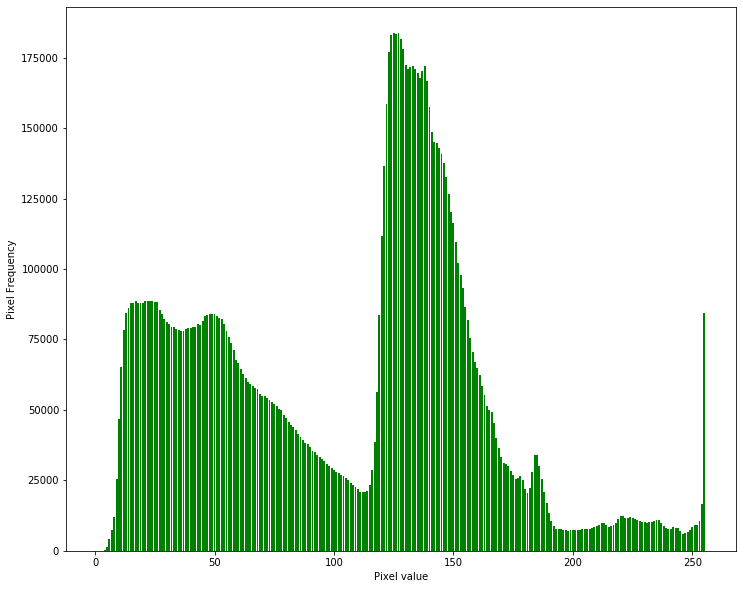

In [12]:
image_information(imarray).frequency_plot()

Now for the second one

The shannon's Theorem will reach a minimum when the derivative of H will be 0; if this condition is satisfied the image will be lossless after compression. it can be seen the jpeg and png format reduct the size of the file from 13,669kb as a tiff to 6104kb as png and 1279 kb as a jpeg. Calculations of the shannon entrophy will be run below to ensure the file is accurate, to no information loss


In [13]:
"""
This class is a weighted binary tree meant to make Hoffman encoding work.

Attributes:
  rightTree: Right subtree of the binary tree
  leftTree: Left subtree of the binary tree
  weight: Weight of the binary tree. Leave blank if not leaf node.
  name: Name of the leaf node/thing to be encoded. Leave blank if not leaf node.
  bitName: The hoffman encoding bitstring name for the node. Should only apply to leaf nodes.
"""
class weightedBinaryTree:
    def __init__(self, rightTree = None, leftTree = None, weight = None, name = None, bitName = ""):
        #Tree Structure
        self.rightTree = rightTree
        self.leftTree = leftTree

        #Name of thing to be encoded
        self.name = name
        self.bitName = bitName
        self.weight = weight

        #If this isn't a leaf node, then its weight depends on its subtrees.
        #Also if it isn't a leaf node, then its leaves gets a longer encodng length.
        if self.weight == None:
            self.calcWeight()
            self.rightTree.appendBitName(0)
            self.leftTree.appendBitName(1)

        #Given that this isn't a leaf node, its weight is the sum of the
        #weights of its two branches, left and right. 
    def calcWeight(self):
        tempWeight = 0
        #print("Calcing Weight")
        if self.rightTree != None:
            tempWeight += self.rightTree.getWeight() 
        if self.leftTree != None:
            tempWeight += self.leftTree.getWeight()
            self.weight = tempWeight

        #Needed Getters
    def getRightTree(self):
        return self.rightTree

    def getLeftTree(self):
        return self.leftTree

    def getBitName(self):
        return self.bitName

    def getName(self):
        return self.name

    def getWeight(self):
        return self.weight

    def isLeaf(self):
        return ((self.rightTree == None) and (self.leftTree == None))

    #Lets us set the name to each leaf node, used for hoffman encoding.
    def appendBitName(self, number):
        if not self.isLeaf():
            self.rightTree.appendBitName(number)
            self.leftTree.appendBitName(number)
        if self.isLeaf():
            #print(number)
            self.bitName = "{}".format(number) + self.bitName
        return

  

In [14]:
"""
This function, given a list of weighted binary trees,
returns the list sorted by the weight of the trees in
largest to smallest order. Uses quicksort.

Parameters:
  trees - the list of weighted binary trees.
"""
def sortTrees(trees):
    if len(trees) == 0:
        return trees
    lastTree = trees.pop()
    weight = lastTree.getWeight()

      #print(lastTree.isLeaf())
      #print("sorting")
      #for entity in trees:
        #print(entity.getWeight())
      #print(len(trees))
      #print(weight)
    return sortTrees([x for x in trees if x.getWeight() > weight]) + [lastTree] + sortTrees([x for x in trees if x.getWeight() <= weight])

"""
This function, given a list in [[Name, Frequency]] or
[(Name, Frequency)] format, makes an equivalent list of
binary tree leaf nodes.

Parameters:
  List - the list as described above
Returns:
  nodes - a list of all the leaf nodes generated from the list
"""
def makeTree(list):
    nodes = []
  #print("Making a tree")
  #print(list)
    for entry in list:
        node = weightedBinaryTree(name = entry[0], weight = entry[1])
        nodes.append(node)
    return nodes

In [15]:
"""
This function, given a list of names and frequencies of these names, returns a hoffman
encoding binary tree with these names, frequencies, and their bitname in the encoding in
the leaf nodes of this tree.

Parameters:
  imageData: A [[Name, Frequency]] containing the data we care about and its frequency.
Returns:
  The single tree corrisponding to the formed up together Hoffman encoding tree.
"""
def encodeHoffman(imageData):
    #Preliminary processing and sorting into ordered trees.
    nodes = makeTree(imageData)
    nodes = sortTrees(nodes)
    #for tree in nodes:
    #print(tree.getWeight())  
    #While they are not all joined into a single tree
    while len(nodes) > 1:
        #Join the last 2 together
        #print("encoding")
        firstEnd = nodes.pop()
        secondEnd = nodes.pop()
        newNode = weightedBinaryTree(firstEnd, secondEnd)
        nodes.append(newNode)

        #Then sort the list again.
        #print(nodes)
        nodes = sortTrees(nodes)
        
    return nodes.pop()

Current idea for Huffman: We need to feed into a list of the (colour weights, frequency). It must then be sorted before or after, and then from there we group the last two together, put it back into the list sorted, then keep doing that, generally speaking. until we have one element left. Actually instead of a list we should turn it into a binary tree of sorts. A list of binary trees and elements. From there, 0 means travel left, 1 means travel right. 

In [16]:
"""
This function does a depth first search of the Hoffman binary tree
and returns [(Name, BitName)], a list of each name and their encodings
in the Hoffman style.

Parameters:
  tree: the Hoffman tree to search.
Returns:
  Results: A list of the names and the encodings of these names from the hoffman tree.
"""
def searchHoffman(tree):
    results = []
    if tree.isLeaf():
        return [(tree.getName(), tree.getBitName())]
    results += (searchHoffman(tree.getRightTree()))
    results += (searchHoffman(tree.getLeftTree()))
    return results

"""
This function, given the results of searchHofffman() above,
returns a [(Name, length of Bitstrings)].

Parameters:
  results: Feed in the results of searchHoffman() above.
Returns: A list of names and the length of their bitstring encodings.
"""
def getBitLengths(results):
    lengths = []
    for entry in results:
        lengths.append((entry[0], len(entry[1])))
    return lengths

"""
This function, given a list of names and their frequencies,
in (Name, Frequency) style, as well as the total, returns
a list in the same style except instead of frequency it is
probability.xpect is 7.5. This comes from summing up the probabilities of each number appearing multiplied by the length of its bitstring. I must make a function that lets us calculate this.

Parameters:
  nameAndFrequency: A [(Name, Frequency)] list.
  total: The total/sum of all the Frequencies.
Returns:
  A list of names and the probability of these names showing up.
"""
def calcProbabilities(nameAndFrequency, total):
    ## Maybe I should just calculate the total here. Eh, doesn't matter.
    probabilityList = []
    for entry in nameAndFrequency:
        probabilityList.append((entry[0], float(entry[1])/total))
    return probabilityList

"""
This function, given a list of tuples, sorts the
list based on the value of its first element.

The intended use is for the summation function to have a
nice sorted list to process. Else we're forced to use name matching, 
and that would be a pain. It only works on numerical names though.

Parameters:
  alist: The [(name, stuff)] to process on its integer names
Returns:
  The list, sorted on its integer names.
"""
def sortFirst(alist):
    if alist == []: return []
    return sortFirst([x for x in alist[1:] if x[0] < alist[0][0]]) + [alist[0]] + sortFirst([x for x in alist[1:] if x[0] >= alist[0][0]])

In [17]:
#Testing Data
test = [[x,x] for x in range(12)]
print(test)
#test = [[1,2],[2,4],[3,1],[4,3]]#,[5,5],[6,2],[7,2],[8,10],[9,12]]
tree= encodeHoffman(test)

#Testing the sort function.
#sortFirst(calcProbabilities(imageData, imagePixelTotal))
sortFirst(searchHoffman(tree))
sortFirst(getBitLengths(searchHoffman(tree)))

[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10], [11, 11]]


[(0, 6),
 (1, 6),
 (2, 5),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 3),
 (7, 3),
 (8, 3),
 (9, 3),
 (10, 3),
 (11, 3)]

In [18]:
#Our actual image.

y = image_information(imarray).pixel_count()

key_lst = list(y.keys())
value_lst = list(y.values())

#Turning image frequency data into our algorithm's format.
frequency_lst = list(zip(key_lst,value_lst))
huffmanFrequencyLst = []
for a in (frequency_lst):
    a = list(a)
    huffmanFrequencyLst.append(a)

"""
#Counting total pixels to calculate probabilities.
totalPixels = 0
for entry in huffmanFrequencyLst:
  totalPixels += entry[1]
   
"""
totalPixels = image_information(imarray).pixel_number()
#Calculating probabilities.
probLst = calcProbabilities(huffmanFrequencyLst, totalPixels)
    

Not done: The average bit length to expect is 7.5. This comes from summing up the probabilities of each number appearing multiplied by the length of its bitstring. I must make a function that lets us calculate this.

In [19]:
#Encoding it into a Huffman tree.
tree= encodeHoffman(huffmanFrequencyLst)

#Testing the sort function.
#sortFirst(calcProbabilities(imageData, imagePixelTotal))

#Sorting the tree from pixel value 1 to 255.
sortFirst(searchHoffman(tree))

#Getting the lengths of the bits.
bits = (list(sortFirst(getBitLengths(searchHoffman(tree)))))

#Sorting the probability list the same way.
probLst = list(sortFirst(probLst))

shannonExpected = 0

#Getting the average weighted bit string length.
for index in range(len(bits)):
    shannonExpected += bits[index][1] * probLst[index][1]
print(shannonExpected)
#Expected minimum file size at least by Huffman approximating Shannon.
print(shannonExpected * totalPixels)

7.505605352652031
105054456.99999996


In [20]:
"""
Calculates what Shannon's equation would have us expect to find.
Parameters:
  problist - our list of probabilities.
Returns:
  The shannon probability expected for our probability list.
"""
def shannonLength(probLst):
  sum = 0
  for entry in probLst:
    sum += entry[1]*np.log2(entry[1])
  return -sum

In [21]:
expectedLength = shannonLength(probLst)
print(expectedLength)

7.46298855107144


In [22]:
#Here we actually get our encodings based off the data we have.

#Encoding it into a Huffman tree.
tree= encodeHoffman(huffmanFrequencyLst)

#Testing the sort function.
#sortFirst(calcProbabilities(imageData, imagePixelTotal))

#Sorting the tree from pixel value 1 to 255.
hoffmanBitstrings = sortFirst(searchHoffman(tree))

#Getting the lengths of the bits.
bits = (list(sortFirst(getBitLengths(searchHoffman(tree)))))

#Sorting the probability list the same way.
probLst = list(sortFirst(probLst))

In [23]:
#Here we get our image data and format it into a form we can use.

#Our actual image.

y = image_information(imarray).pixel_count()

key_lst = list(y.keys())
value_lst = list(y.values())

#Turning image frequency data into our algorithm's format.
frequency_lst = list(zip(key_lst,value_lst))
huffmanFrequencyLst = []
for a in (frequency_lst):
    a = list(a)
    huffmanFrequencyLst.append(a)

"""
#Counting total pixels to calculate probabilities.
totalPixels = 0
for entry in huffmanFrequencyLst:
  totalPixels += entry[1]
   
"""
totalPixels = image_information(imarray).pixel_number()
#Calculating probabilities.
probLst = calcProbabilities(huffmanFrequencyLst, totalPixels)

In [24]:
#Here we actually get our encodings based off the data we have.

#Encoding it into a Huffman tree.
tree= encodeHoffman(huffmanFrequencyLst)

#Testing the sort function.
#sortFirst(calcProbabilities(imageData, imagePixelTotal))

#Sorting the tree from pixel value 1 to 255.
hoffmanBitstrings = sortFirst(searchHoffman(tree))

#Getting the lengths of the bits.
bits = (list(sortFirst(getBitLengths(searchHoffman(tree)))))

#Sorting the probability list the same way.
probLst = list(sortFirst(probLst))

In [25]:
#Here we get our average bit length

huffmanAverage = 0

#Getting the average weighted bit string length.
for index in range(len(bits)):
    huffmanAverage += bits[index][1] * probLst[index][1]
print(huffmanAverage)
#Expected minimum file size at least by Huffman approximating Shannon.
print(huffmanAverage * totalPixels)

7.505605352652031
105054456.99999996


In [26]:
"""
Calculates what Shannon's equation would have us expect to find.
Parameters:
  problist - our list of probabilities.
Returns:
  The shannon probability expected for our probability list.
"""
def shannonLength(probLst):
  sum = 0
  for entry in probLst:
    sum += entry[1]*np.log2(entry[1])
  return -sum

In [27]:
expectedLength = shannonLength(probLst)
print(expectedLength)

7.46298855107144


In [29]:
#Summary of all our data:
#Our bitstrings
print("Our encodings were:")
print(hoffmanBitstrings)
#Our encoded average length
print("Our average length was:")
print(huffmanAverage)
#Our encoding size
print("The expected size of the encoding was:")
print(huffmanAverage * totalPixels)
#Comparison to part A and B
print("Our average length is smaller than in the original TIF file, producing a file size that is slightly smaller")
print("It is much bigger than the files and sizes in part B, however, since many of the image compression methods in part B are either lossy or appear to be superior.")
#Shannon's prediction
print("Shannon's stuff expects that we have an average bit length of")
print(expectedLength)
#Our comparison
print("Compared to our Hoffman encoding, Shannon's expected bit length is smaller")
print("We can see that the hoffman encoding tries to approach the mean bit length of Shannon, but Shannon's is still smaller. Hoffman encoding does not equal Shannon.")
#print("That is what I think we're supposed to say. But we can't actually calculate the Shannon Entropy. We're getting insane numbers because we did something wrong, sorry.")

print("Thus all results match including the expected size for the jpeg")

Our encodings were:
[(1, '1000001100000000'), (2, '1000001100000001'), (3, '100000110000001'), (4, '10000011000001'), (5, '1000001100001'), (6, '100000110001'), (7, '10101010001'), (8, '1000001110'), (9, '100100100'), (10, '10000000'), (11, '10111110'), (12, '11100100'), (13, '0001011'), (14, '0011001'), (15, '0100011'), (16, '0100010'), (17, '0101111'), (18, '0100101'), (19, '0100001'), (20, '0100100'), (21, '0101101'), (22, '0101011'), (23, '0101100'), (24, '0101110'), (25, '0101010'), (26, '0100111'), (27, '0011000'), (28, '0001000'), (29, '11111010'), (30, '11110110'), (31, '11110011'), (32, '11101011'), (33, '11101101'), (34, '11100101'), (35, '11100011'), (36, '11100001'), (37, '11100000'), (38, '11101000'), (39, '11101001'), (40, '11101010'), (41, '11110000'), (42, '11101100'), (43, '11110100'), (44, '11110010'), (45, '11110111'), (46, '11111110'), (47, '0000100'), (48, '0001010'), (49, '0000101'), (50, '0001001'), (51, '0000010'), (52, '11111100'), (53, '11111011'), (54, '11110